In [ ]:
# Importando o pandas
import pandas as pd
import numpy as np

!pip install matplotlib==3.5.0

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Folha de estilo FiveThirtyEight
plt.rcParams['lines.linewidth'] = 1.5 # Configuração da largura de linha
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Biblioteca estatística projetada para preencher o vazio nos recursos de análise de séries temporais do Python
!pip install pmdarima
from pmdarima import auto_arima # Ao inves de ficar testano os pdq o auto_arima ajuda a achar esses parâmetros sozinhos

from statsmodels.tsa.arima.model import ARIMA # Aqui tem muitos modelos de estatistica

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Lendo o CSV, setando o separador padrão para virgula e convertendo os campos que contém data para o tipo data
dados = pd.read_csv('/content/drive/MyDrive/FATEC - BANCO DE DADOS/6° SEMESTRE/API/h_m_r_silver12.csv', sep=";", parse_dates=['dt_competencia','competencia'])

# Dropando as colunas que não serão usadas
dados = dados.drop(['_id', '_idFile', '_idLog_x', '_idLog_y', '_id_x', '_id_y',
       '_idheader_bronze', '_lineNumber', 'contrato',
       'dt_inclusao', 'nXmX_bXnXfiWiXriX', 'numero_fatura',
       'outros', 'outros_orig', 'plano', 'rubrica',
       'time_stamp_x', 'time_stamp_y', 'tp_beneficiario',], axis=1)

# Mergeando a coluna competencia na coluna dt_competencia e dropando a coluna competencia
dados['dt_competencia'].fillna( dados['competencia'], inplace=True)
dados = dados.drop(['competencia'], axis=1)

# Tranformando a dt_competencia em data
dados['dt_competencia'] = pd.to_datetime(dados['dt_competencia'], format='%Y/%m/%d', utc=True)

# Formatando a coluna dt_competencia
data_formatada = dados['dt_competencia'].dt.strftime('%m/%Y')

# Setando na coluna dt_competencia a data formatada
dados['dt_competencia'] = data_formatada

# Mergeando as colunas valor_orig e saude_net_orig
dados['valor_orig'].fillna( dados['saude_net_orig'], inplace=True)

dados.head(1000)

,dt_competencia,marca_otica,resultado,valor_orig,saude_net_orig
0,08/2019,291305148,conciliado,3892.76,NaN
1,08/2019,291441203,conciliado_com_div,2834.42,NaN
2,08/2019,291469272,mensalidade_marca_otica_repetida,8525.43,NaN
3,11/2019,131064185,somente_mensalidade,2457.66,NaN
4,11/2019,131311786,somente_repasse,2457.66,NaN
...,...,...,...,...,...
995,04/2022,73482653,somente_mensalidade,1370.25,1370.25
996,04/2022,73696350,somente_mensalidade,1172.36,1172.36
997,04/2022,73698116,somente_mensalidade,1784.23,1784.23
998,04/2022,73696461,somente_mensalidade,1269.46,1269.46


In [ ]:
# Agrupando os dados pela competencia e pelo resultado e por fim somando os valores desse agurpamento
dados = dados.groupby(['dt_competencia', 'resultado'])['valor_orig'].agg('sum')

# Transformando os dados em dataframe novamente
dados = dados.to_frame()

# Resetando os index do dataframe
dados.reset_index(inplace=True)

# Setando a dt_competencia como index
dados = dados.set_index('dt_competencia')

# Formatando a data e setando como index
dados.index = pd.to_datetime(dados.index, format='%m/%Y')

dados.head(200)

,resultado,valor_orig
dt_competencia,,
2020-01-01,conciliado,132596.07
2020-01-01,conciliado_com_div,64404.84
2020-01-01,mensalidade_marca_otica_repetida,3157.02
2020-01-01,somente_mensalidade,176746.15
2020-01-01,somente_repasse,1632.20
...,...,...
2020-11-01,somente_mensalidade,561729.54
2020-11-01,somente_repasse,56790.08
2021-11-01,conciliado,738206.96


In [ ]:
# Validando os resultados que são 'conciliado'
select_conciliado = dados['resultado'] == 'conciliado'

# pegando os dados que são True
select_conciliado = dados[select_conciliado]['valor_orig']

# Transformando em dataframe
select_conciliado = select_conciliado.to_frame()

#--------------------------------------------------

# Validando os resultados que são 'somente_mensalidade'
select_somente_mensalidade = dados['resultado'] == 'somente_mensalidade'

# pegando os dados que são True
select_somente_mensalidade = dados[select_somente_mensalidade]['valor_orig']

# Transformando em dataframe
select_somente_mensalidade = select_somente_mensalidade.to_frame()

#--------------------------------------------------

# Validando os resultados que são 'somente_repasse'
select_somente_repasse = dados['resultado'] == 'somente_repasse'

# pegando os dados que são True
select_somente_repasse = dados[select_somente_repasse]['valor_orig']

# Transformando em dataframe
select_somente_repasse = select_somente_repasse.to_frame()

#--------------------------------------------------

# Validando os resultados que são 'conciliado_com_div'
select_conciliado_com_div = dados['resultado'] == 'conciliado_com_div'

# pegando os dados que são True
select_conciliado_com_div = dados[select_conciliado_com_div]['valor_orig']

# Transformando em dataframe
select_conciliado_com_div = select_conciliado_com_div.to_frame()

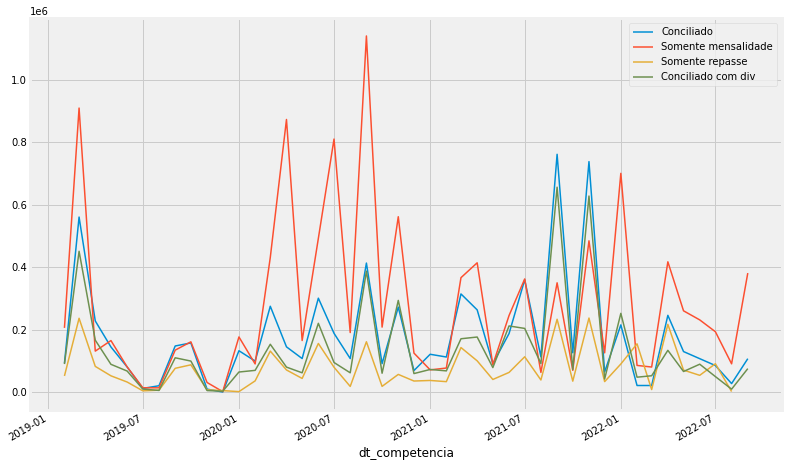

In [ ]:
# Plota os dados
fig, ax = plt.subplots(figsize=(12, 8))
select_conciliado['valor_orig'].plot(ax=ax, label='Conciliado')
select_somente_mensalidade['valor_orig'].plot(ax=ax, label='Somente mensalidade')
select_somente_repasse['valor_orig'].plot(ax=ax, label='Somente repasse')
select_conciliado_com_div['valor_orig'].plot(ax=ax, label='Conciliado com div')
ax.legend();

In [ ]:
# Inserindo frequencia no dataframe
select_conciliado = select_conciliado.asfreq('MS')

# Transformando os dados nulos em 0
select_conciliado = select_conciliado.fillna (0)

# Ordenando os index
select_conciliado = select_conciliado.sort_index()

In [ ]:
# Código para verificar se não existem "buracos" nos dados
(select_conciliado.index == pd.date_range(start=select_conciliado.index.min(),
                             end=select_conciliado.index.max(),
                             freq=select_conciliado.index.freq)).all()

True

<Figure size 864x864 with 0 Axes>

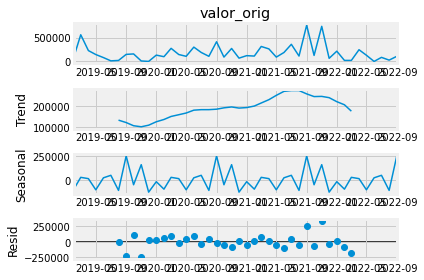

In [ ]:
# Primeiro, vamos decompor a série pra avaliar tendência
# Sazonalidade e resíduo
from statsmodels.tsa.seasonal import seasonal_decompose

conciliado = seasonal_decompose(select_conciliado['valor_orig'])

fig = plt.figure(figsize=(12, 12))  
fig = conciliado.plot()

In [ ]:
# Teste de estacionariedade. 
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(select_conciliado['valor_orig'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-3.0185206496082815
p-valor:0.03320063180264529


In [ ]:
# Auto ARIMA nos ajuda a buscar os melhores parâmetros
fit_arima = auto_arima(select_conciliado['valor_orig'], d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=True, 
                           m=6, 
                           D=1, 
                           start_P=1, 
                           start_Q=1, 
                           max_P=2, 
                           max_Q=2, 
                           information_criterion='aic',
                           trace=True, 
                           error_action='ignore', 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1010.261, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=1054.756, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=1007.895, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=1024.477, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=1025.136, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=1008.080, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=1008.073, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[6]             : AIC=1008.163, Time=0.04 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=1010.084, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[6]             : AIC=1021.613, Time=0.02 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=1007.300, Time=0.09 sec
 ARIMA(2,1,0)(0,1,0)[6]             : AIC=1023.506, Time=0.03 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=1007.197, Time=0.09 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=1009.149, Time=0.16 sec
 ARIMA(2,1,0)(1,1,1)[6]          

In [ ]:
# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX 
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(select_conciliado['valor_orig'],order=(2,1,1),  seasonal_order=(0, 1, 1, 6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# resultados do modelo SARIMAX(2,1,1)
# ar.L1 = coeficiente do dia anterior ar.L2 = coeficiente de dois dias anteriores ma.L1 = Média movel do dia anterior
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        valor_orig   No. Observations:                   44
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 6)   Log Likelihood                -497.111
Date:                           Wed, 23 Nov 2022   AIC                           1004.222
Time:                                   23:37:12   BIC                           1012.276
Sample:                               02-01-2019   HQIC                          1007.062
                                    - 09-01-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5209      0.549     -2.768      0.006      -2.598      -0.444
ar.L2         -0.7184      0.387     -1.857      0.063      -1.477       0.040
ma.L1          0.6369      0.727      0.876      0.381      -0.788       2.062
ma.S.L6       -0.6847      0.583     -1.175      0.240      -1.826       0.457
sigma2      4.072e+10   1.87e-11   2.18e+21      0.000    4.07e+10    4.07e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.96   Prob(JB):                         0.88
Heteroskedasticity (H):               2.96   Skew:                             0.02
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+38. Standard errors may be unstable.
"""

In [ ]:
# Vamos realizar um "backtesting" com predições de valores dos 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [ ]:
# intervalo de confiança
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(-121084.55832255527, 672614.0250976798)

In [ ]:
# Aqui estamos pegando as datas previstas e as datas totais
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(select_conciliado.index)

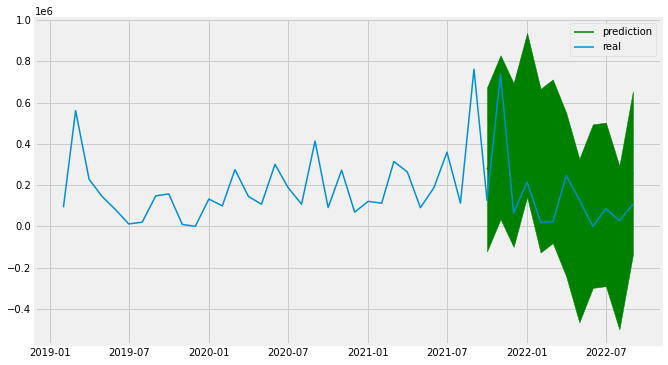

In [ ]:
# Plotando o gráfico das predições dos 12 meses para trás
plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='green',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='green')
plt.plot(datas, select_conciliado['valor_orig'].values, label='real')
plt.legend()
plt.show()